# Makeover Monday Challenge
Attempting the #MakeoverMonday challenge dated 4/1/2021

Taking inspiration from Dana Oye

In [1]:
#Importing requires packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data from [Here](https://data.world/makeovermonday/2021w1).

In [2]:
#Reading in the excel data file
df = pd.read_excel("RailsToTrails_National Count Data_week.xlsx")

In [3]:
#converting the Bikes sighted to thousands count
df["Counts (k)"] = df["Bikes (14 counters)"] / 1000

In [4]:
#Removing the "week" from Timeframe column to look better when plotting
df["Timeframe"] = df["Timeframe"].str.replace("Week","")

In [5]:
#Creating two seperate DataFrames for the seperate years' data
y2019 = df[df["Year"] == 2019][["Year", "Timeframe", "Counts (k)"]]
y2020 = df[df["Year"] == 2020][["Year", "Timeframe", "Counts (k)"]]

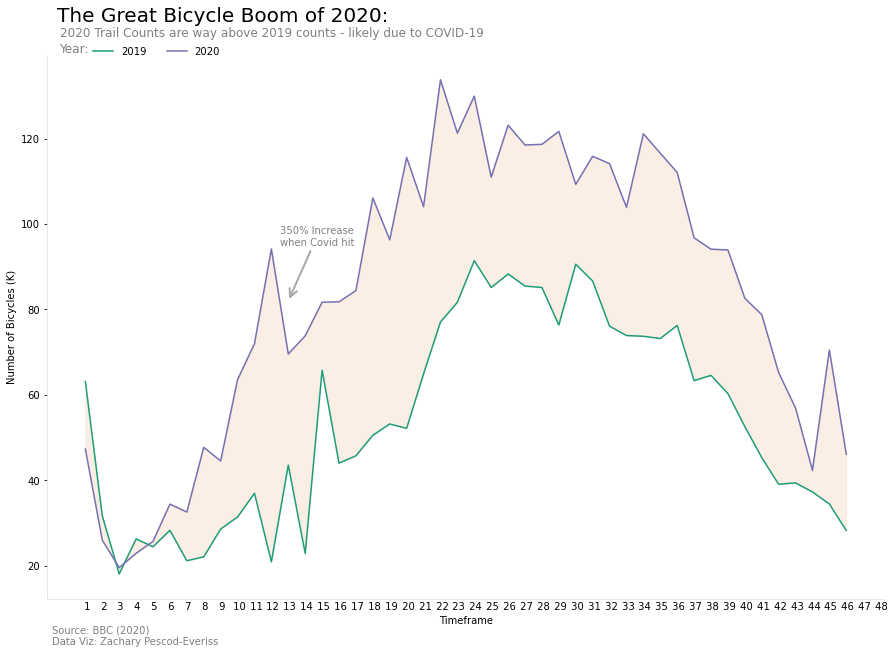

In [6]:
#Plotting the data
fig, ax = plt.subplots(1, figsize=(15,10))
sns.lineplot(x="Timeframe", y="Counts (k)", data=y2019, ax=ax, label="2019", color="#1b9e77")
sns.lineplot(x="Timeframe", y="Counts (k)", data=y2020, ax=ax, label="2020", color="#7570b3")
ax.fill_between(y2019["Timeframe"], y2019["Counts (k)"], y2020["Counts (k)"], color="#d95f02", alpha=0.1)
plt.legend(loc = (0.05,0.99), ncol=2, frameon=False)

ax.spines['bottom'].set_color('#e0e0e0')
ax.spines['left'].set_color('#e0e0e0')

plt.ylabel("Number of Bicycles (K)")
ax.tick_params(axis='x', which='major',length=0)
plt.title("The Great Bicycle Boom of 2020:", fontsize=20, x=0.21, y=1.05)
plt.suptitle("2020 Trail Counts are way above 2019 counts - likely due to COVID-19", color="grey",
             y=0.92, x=0.333, fontsize= 12)
plt.text(-1.5,140, "Year:", fontsize=12, color="grey")
plt.text(-2,1.5, "Source: BBC (2020) \nData Viz: Zachary Pescod-Everiss", fontsize=10, color="grey")
sns.despine()

ax.annotate("350% Increase\nwhen Covid hit", xy=(12, 82), xytext=(11.5, 95),
            arrowprops=dict(arrowstyle="->",color="darkgrey", linewidth=2, mutation_scale=20),color="grey")

plt.savefig("Bicycle_boom_2020.png", dpi=200, facecolor="white", bbox_inches="tight")
plt.show()